# 🩺 Sleep Disorder Classification Project  

## Conjunto de datos
Para esta actividad se utilizará un dataset que incluye detalles como: sexo, edad, ocupación, duración del sueño, calidad del sueño, nivel de actividad física, niveles de estrés, categoría de IMC, presión arterial, frecuencia cardíaca, pasos diarios y presencia o ausencia de trastornos del sueño, en un conjunto de personas.


In [ ]:
#Importar paquetes utilizados para este trabajo práctico
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from tabulate import tabulate

In [ ]:
#importar dataframe
df = pd.read_csv("sleep_dataset.csv", sep=";")

## Práctica
Utilizando Python, sin recurrir a otros paquetes externos que no sean los vistos en la
cátedra:


### 1. Realizar un análisis exploratorio de datos y presentar los resultados más importantes.


In [ ]:
# Visualizar la forma del dataframe
df.shape

(374, 13)

In [ ]:
# Visualizar los primeros
#registros del dataframe
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27.0,Software Engineer,6.1,6,42,6,Overweight,126/83,77.0,4200,Normal
1,2,Male,28.0,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000,Normal
2,3,Male,28.0,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000,Normal
3,4,Male,28.0,Sales Representative,5.9,4,30,8,Obese,140/90,85.0,3000,Sleep Apnea
4,5,Male,28.0,Sales Representative,5.9,4,30,8,Obese,140/90,85.0,3000,Sleep Apnea


In [ ]:
# Visualizar las columnas del dataframe
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [ ]:
# Visualizamos la descripción de las variables numéricas
# (include=np.number) sin el ID
df.drop("Person ID", axis=1, inplace=False).describe(include=np.number).T


,count,mean,std,min,25%,50%,75%,max
Age,370.0,42.286486,8.656597,27.0,36.0,43.0,50.0,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.4,7.2,7.8,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.0,7.0,8.0,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.0,60.0,75.0,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.0,5.0,7.0,8.0
Heart Rate,368.0,70.190217,4.163120,65.0,68.0,70.0,72.0,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.0,7000.0,8000.0,10000.0


In [ ]:
df.describe(include=object).T

,count,unique,top,freq
Gender,374,2,Male,189
Occupation,374,11,Nurse,73
BMI Category,374,4,Normal,195
Blood Pressure,374,25,130/85,99
Sleep Disorder,374,3,Normal,219


In [ ]:
#ver valores unicos de las variables categoricas
def tostr(xs):
    return "\n".join(str(x) for x in xs)

data = []

for col in df.columns:
    if df[col].dtype == 'object':
        data.append([col, tostr(df[col].unique()), len(df[col].unique())])

data = np.array(data, dtype=object)
encabezados = ['Variable', 'Valores', 'cantidad']
print(tabulate(data, headers=encabezados, tablefmt="fancy_grid"))

╒════════════════╤══════════════════════╤════════════╕
│ Variable       │ Valores              │   cantidad │
╞════════════════╪══════════════════════╪════════════╡
│ Gender         │ Male                 │          2 │
│                │ Female               │            │
├────────────────┼──────────────────────┼────────────┤
│ Occupation     │ Software Engineer    │         11 │
│                │ Doctor               │            │
│                │ Sales Representative │            │
│                │ Teacher              │            │
│                │ Nurse                │            │
│                │ Engineer             │            │
│                │ Accountant           │            │
│                │ Scientist            │            │
│                │ Lawyer               │            │
│                │ Salesperson          │            │
│                │ Manager              │            │
├────────────────┼──────────────────────┼────────────┤
│ BMI Cate

Podemos observar dos curiosidades. En BMI Cat los valores Normal y Normal Weight refieren al mismo valor, así que posteriormente podemos unificarlos.
Además, la variable Blood Presure refiere a valores numericos de dos presiones (diastolica y sistolica), pero se encuentra representado en un solo valor y en string. Va a ser más útil separar estos valores para el entrenamiento de un modelo.

Ver valores Faltantes

In [ ]:
#ver valores faltantes
df.isnull().sum()



,0
Person ID,0
Gender,0
Age,4
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


### 2. Preprocesar el conjunto de datos para que pueda utilizarse en los distintos tipos de modelos vistos en clase.



#### Análisis de las variables.

In [ ]:
#Eliminar ID - ya que no aporta valor predictivo al modelo
df.drop("Person ID", axis=1, inplace=True)

#### Valores erróneos/faltantes, identificación de variable objetivo.

In [ ]:
#reemplazar faltantes con mediana de age y heartrate - evitamos utilizar la media pq es un valor muy sensible a los atipicos

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Heart Rate'].fillna(df['Heart Rate'].median(), inplace=True)
df.isnull().sum()


<ipython-input-14-9957a6973711>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-14-9957a6973711>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0
Heart Rate,0


#### Procesamiento de variables categóricas.

In [ ]:
#tratar el dato de la presion arterial para ser utilizado posteriormente

presion_sistolica = []
presion_diastolica = []
for e in df['Blood Pressure']:
  presion_sistolica.append(int(e.split('/')[0]))
  presion_diastolica.append(int(e.split('/')[1]))

df['presion_sistolica'] = presion_sistolica
df['presion_diastolica'] = presion_diastolica
df.drop('Blood Pressure', axis=1, inplace=True)

In [ ]:
#unificamos en BMI los valores de normal y normal weight a solo normal
df['BMI Category'] = df['BMI Category'].apply(lambda x: 'Normal'
                                              if x in ['Normal', 'Normal Weight']
                                              else x)

#### Valores atípicos.

<Axes: >

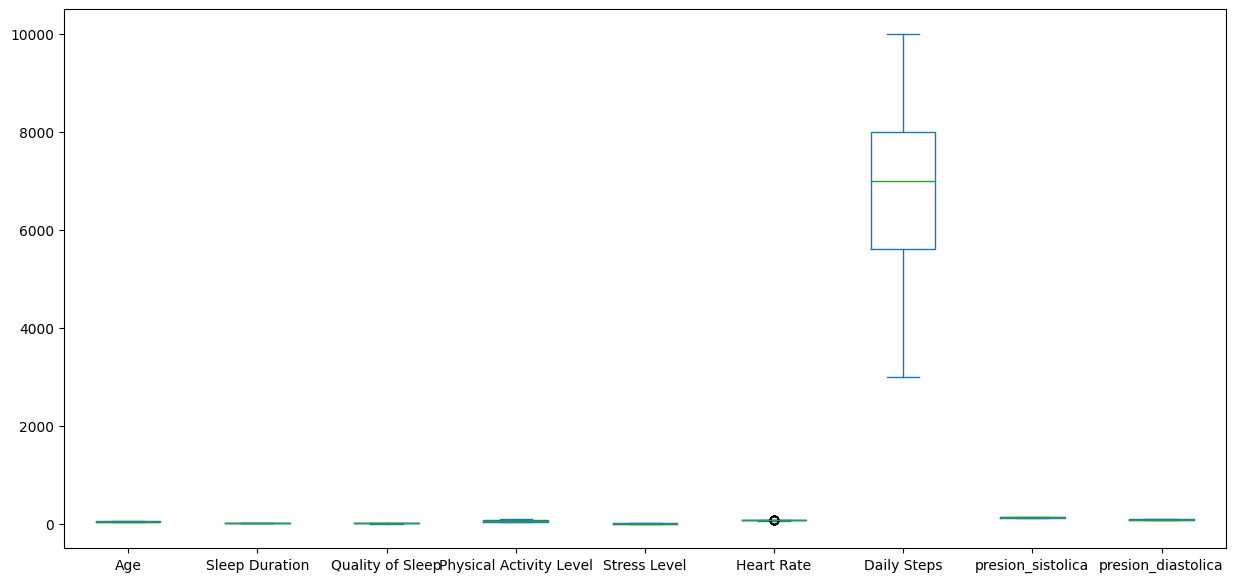

In [ ]:
# Visualizamos valores atípicos con boxplot
# Visualizamos la distribución de las distintas variables
fig, ax = plt.subplots(figsize=(15,7))
df.plot(kind='box', ax=ax)

Text(0.5, 0, 'Heart Rate')

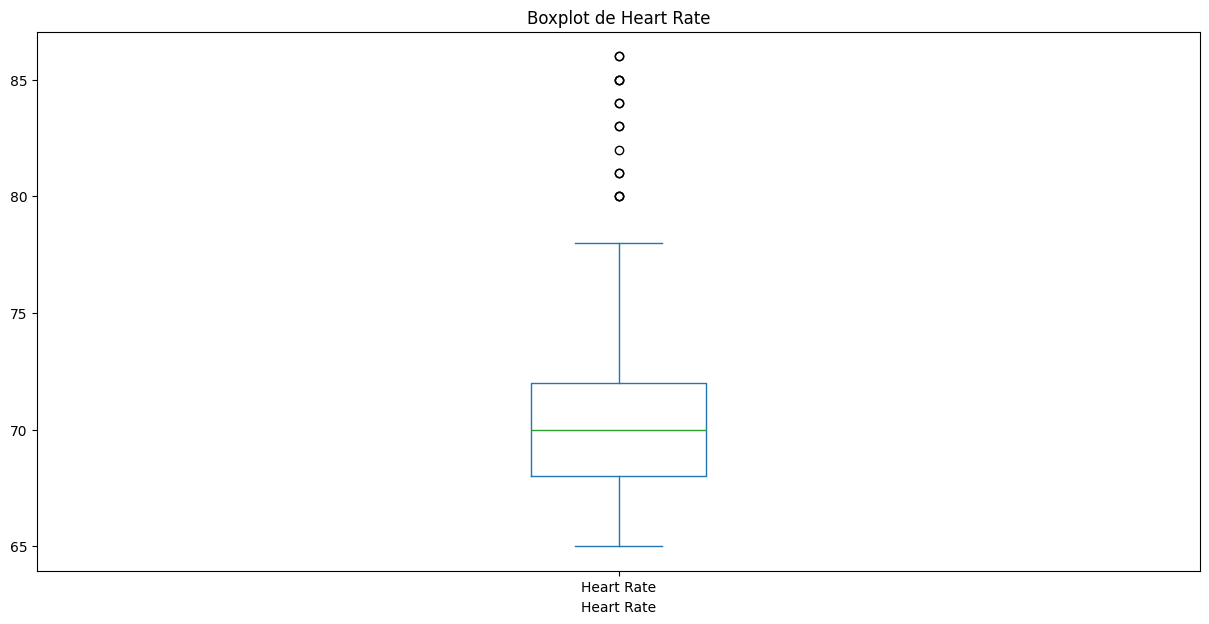

In [ ]:
# Visualizamos con mas detalle los valores atipicos en la variable Heart Rate
fig, ax = plt.subplots(figsize=(15,7))
df['Heart Rate'].plot(kind='box', ax=ax)
plt.title('Boxplot de Heart Rate')
plt.xlabel('Heart Rate')

In [ ]:
#En un boxplot,se consideran valores atípicos aquellos que están fuera del rango intercuartílico (IQR),
# definido como el rango entre el primer cuartil (Q1) y el tercer cuartil (Q3).
#Los valores que están por debajo de 𝑄 1 − 1.5 × 𝐼 𝑄 𝑅 Q1−1.5×IQR o por encima de 𝑄 3 + 1.5 × 𝐼 𝑄 𝑅 Q3+1.5×IQR se consideran atípicos.

# Calcular el rango intercuartílico (IQR) de Heart Rate

Q1 = df['Heart Rate'].quantile(0.25)
Q3 = df['Heart Rate'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para detectar valores atípicos

limite_menor = Q1 - 1.5 * IQR
limite_mayor = Q3 + 1.5 * IQR

In [ ]:
# Calcular la mediana de Heart Rate
heart_rate_median = df['Heart Rate'].median()

In [ ]:
# Reemplazar valores atípicos con la mediana
df['Heart Rate'] = np.where(
    (df['Heart Rate'] < limite_menor) |
     (df['Heart Rate'] > limite_mayor),
    heart_rate_median,
    df['Heart Rate']
)

In [ ]:
print("DataFrame después de reemplazar valores atípicos en Heart Rate:")
df

DataFrame después de reemplazar valores atípicos en Heart Rate:


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,presion_sistolica,presion_diastolica
0,Male,27.0,Software Engineer,6.1,6,42,6,Overweight,77.0,4200,Normal,126,83
1,Male,28.0,Doctor,6.2,6,60,8,Normal,75.0,10000,Normal,125,80
2,Male,28.0,Doctor,6.2,6,60,8,Normal,75.0,10000,Normal,125,80
3,Male,28.0,Sales Representative,5.9,4,30,8,Obese,70.0,3000,Sleep Apnea,140,90
4,Male,28.0,Sales Representative,5.9,4,30,8,Obese,70.0,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59.0,Nurse,8.1,9,75,3,Overweight,68.0,7000,Sleep Apnea,140,95
370,Female,59.0,Nurse,8.0,9,75,3,Overweight,68.0,7000,Sleep Apnea,140,95
371,Female,59.0,Nurse,8.1,9,75,3,Overweight,70.0,7000,Sleep Apnea,140,95
372,Female,59.0,Nurse,8.1,9,75,3,Overweight,70.0,7000,Sleep Apnea,140,95


#### Correlación entre variables.

In [ ]:
# Calculamos la matriz de correlación
corr = df.corr(numeric_only=True).abs()

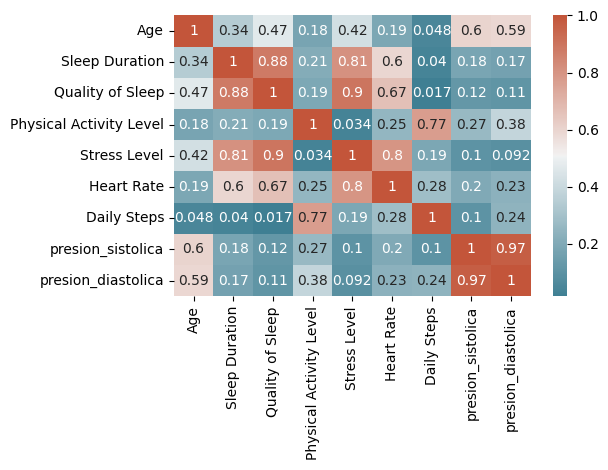

In [ ]:
# Visualizamos la matriz de correlación
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.tight_layout()

In [ ]:
# Calculo de las correlaciones de las columnas dado un umbral
umbral = .80
df_numbers = df[['Age', 'Sleep Duration', 'Quality of Sleep',
                 'Physical Activity Level', 'Stress Level', 'Heart Rate',
                 'Daily Steps', 'presion_sistolica', 'presion_diastolica']]

for i in range(0,len(df_numbers.columns)):
    for j in  range(i,len(df_numbers.columns)):
        if i!=j:
            is_corr=np.abs(df_numbers[df_numbers.columns[i]].corr(df_numbers[df_numbers.columns[j]]))
            if is_corr > umbral:
                print("La variable ", df_numbers.columns[i] ,
                      " está altamente correlacionada con la variable ",
                      df_numbers.columns[j])

La variable  Sleep Duration  está altamente correlacionada con la variable  Quality of Sleep
La variable  Sleep Duration  está altamente correlacionada con la variable  Stress Level
La variable  Quality of Sleep  está altamente correlacionada con la variable  Stress Level
La variable  presion_sistolica  está altamente correlacionada con la variable  presion_diastolica


Más allá de que tenemos alta correlacion entre algunas de las variables no consideramos que sea necesario eliminar ninguna de ellas

#### Encoding de las variables categoricas

In [ ]:
#Aplicamos plicar OneHot Encoding a las columnas Gender, BMI Category y Sleep Disorder, con 0 y 1
df = pd.get_dummies(df, columns=['Gender', 'BMI Category'], dtype=int)


Dado que Ocupation tiene 11 categorías, OneHot podría generar una alta dimensionalidad, por eso decidimos no realizar la codificacion a dicha columna. Para dicha columna utilizaremos el label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
print(df[['Occupation']])

     Occupation
0             9
1             1
2             1
3             6
4             6
..          ...
369           5
370           5
371           5
372           5
373           5

[374 rows x 1 columns]


#### Normalización del conjunto de datos.

In [ ]:
#normalizamos todos los datos numericos entre 0 y 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_numbers = df[['Age', 'Sleep Duration', 'Quality of Sleep',
                 'Physical Activity Level', 'Stress Level', 'Heart Rate',
                 'Daily Steps', 'presion_sistolica', 'presion_diastolica']]

df[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
    'Stress Level', 'Heart Rate', 'Daily Steps', 'presion_sistolica',
    'presion_diastolica']] = pd.DataFrame(scaler.fit_transform(df_numbers),
                                          columns=df_numbers.columns)




(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(1, 0, 'Age'),
  Text(2, 0, 'Sleep Duration'),
  Text(3, 0, 'Quality of Sleep'),
  Text(4, 0, 'Physical Activity Level'),
  Text(5, 0, 'Stress Level'),
  Text(6, 0, 'Heart Rate'),
  Text(7, 0, 'Daily Steps'),
  Text(8, 0, 'presion_sistolica'),
  Text(9, 0, 'presion_diastolica'),
  Text(10, 0, 'Gender_Female'),
  Text(11, 0, 'Gender_Male'),
  Text(12, 0, 'BMI Category_Normal'),
  Text(13, 0, 'BMI Category_Obese'),
  Text(14, 0, 'BMI Category_Overweight')])

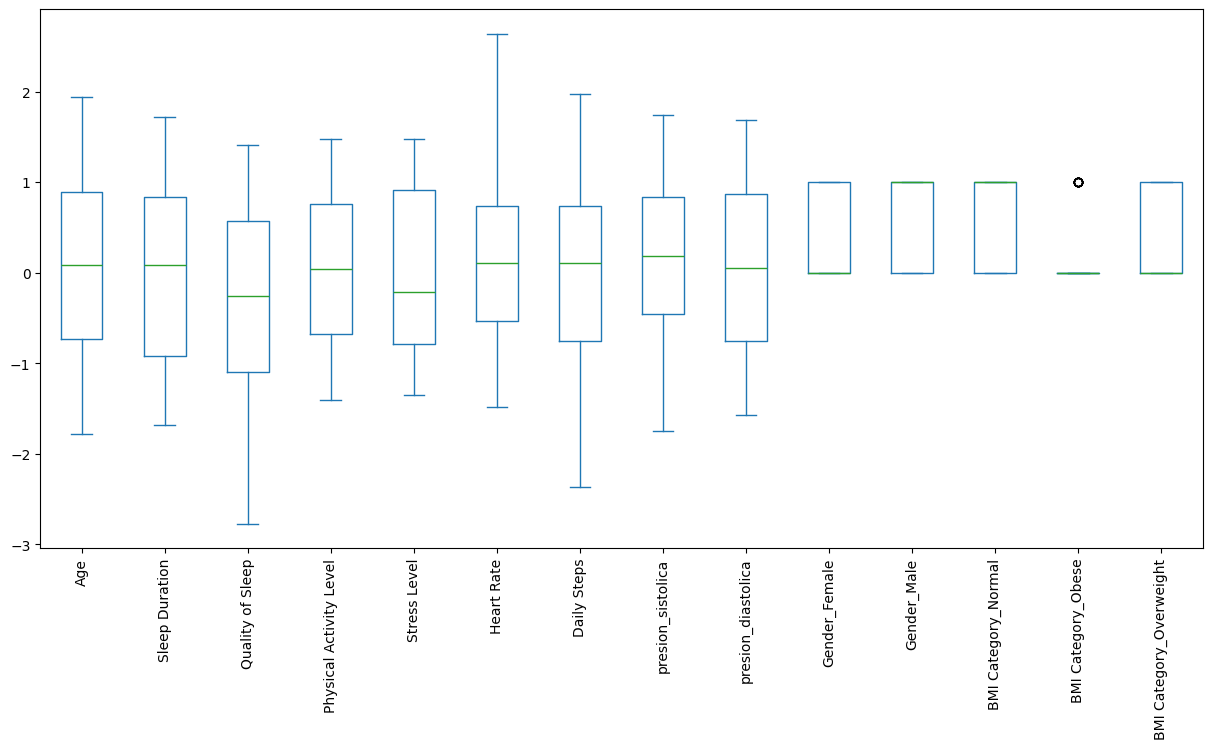

In [ ]:
#boxplot de las variables normalizadas
fig, ax = plt.subplots(figsize=(15,7))
df.plot(kind='box', ax=ax)
plt.xticks(rotation=90)

#### Balance del conjunto de datos.

Nuestra variable objetivo es Sleep Disorder, por ello no la tratamos previamente.

In [ ]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X, y = oversample.fit_resample(df.drop('Sleep Disorder', axis=1), df['Sleep Disorder'])
df = pd.concat([X, y], axis=1)
X, y = oversample.fit_resample(df.drop('Sleep Disorder', axis=1), df['Sleep Disorder'])
df = pd.concat([X, y], axis=1)

In [ ]:
#contamos cuantos samples hay de cada Sleep Desorder
df['Sleep Disorder'].value_counts()

,count
Sleep Disorder,
Normal,219
Sleep Apnea,219
Insomnia,219


### 3. Entrenar y mostrar los resultados obtenidos con al menos dos de los modelos vistos.


In [ ]:
df

,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,presion_sistolica,presion_diastolica,Gender_Female,Gender_Male,BMI Category_Normal,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder
0,-1.778623,9,-1.298887,-1.098280,-0.825418,0.347021,2.322635,-1.619584,-0.330002,-0.268102,0,1,0,0,1,Normal
1,-1.662329,1,-1.173036,-1.098280,0.039844,1.475592,1.689266,1.970077,-0.459239,-0.755640,0,1,1,0,0,Normal
2,-1.662329,1,-1.173036,-1.098280,0.039844,1.475592,1.689266,1.970077,-0.459239,-0.755640,0,1,1,0,0,Normal
3,-1.662329,6,-1.550588,-2.771424,-1.402260,1.475592,0.105844,-2.362273,1.479309,0.869486,0,1,0,1,0,Sleep Apnea
4,-1.662329,6,-1.550588,-2.771424,-1.402260,1.475592,0.105844,-2.362273,1.479309,0.869486,0,1,0,1,0,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,0.896153,5,-1.424738,-1.098280,1.481948,1.475592,1.689266,1.970077,1.479309,1.682049,1,0,0,0,1,Sleep Apnea
653,-1.313445,1,0.714724,-0.261708,0.760896,0.347021,0.105844,0.732263,-1.105421,-0.755640,0,1,1,0,0,Sleep Apnea
654,0.779858,1,1.218127,1.411435,1.241598,-1.345836,0.105844,-1.929038,1.350072,1.031999,0,1,0,1,0,Sleep Apnea
655,1.942804,5,1.092276,1.411435,0.760896,-1.345836,-0.527525,0.113356,1.479309,1.682049,1,0,0,0,1,Sleep Apnea


#### División del conjunto de datos para entrenamiento y prueba.

In [ ]:
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

In [ ]:
from sklearn.model_selection import train_test_split
# Separar el conjunto de datos en una particion para entrenamiento
#y una para test con el 30% del conjunto.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### Instanciación

Los modelos que utilizaremos son KNN, NB, un Decision Tree Classifier y un Random forest Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)

from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth=5)

from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators=100, max_depth=5)

#### Técnicas para análisis y ajuste de hiperparámetros. Entrenamiento de modelos.

Ajustamos los hiperparametros de todos los modelos menos GaussianNB ya que no lo precisa.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_knn_model = GridSearchCV(knn_model, {'n_neighbors': [3, 5, 7, 9]},
                              cv=5, scoring='accuracy')
grid_knn_model.fit(X_train, y_train)
print(grid_knn_model.best_params_)
grid_knn_model.best_estimator_

{'n_neighbors': 5}


KNeighborsClassifier()

In [ ]:
grid_tree_model = GridSearchCV(tree_model, {'max_depth': [2,4,5,6],
                                            'max_features': [5,6,7,8],
                                            'random_state' : [18]}, cv=5,
                               scoring='accuracy')
grid_tree_model.fit(X_train, y_train)
grid_tree_model.best_estimator_

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


DecisionTreeClassifier(max_depth=4, max_features=7, random_state=18)

In [ ]:
grid_forest_model = GridSearchCV(forest_model, {'n_estimators': [10, 50, 100],
                                                'max_depth': [2,4,5,6],
                                                'max_features': [5,6,7,8],
                                                'random_state' : [18]}, cv=5,
                                 scoring='accuracy')
grid_forest_model.fit(X_train, y_train)
grid_forest_model.best_estimator_

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomForestClassifier(max_depth=5, max_features=5, n_estimators=10,
                       random_state=18)

In [ ]:
knn_model = grid_knn_model.best_estimator_
tree_model = grid_tree_model.best_estimator_
forest_model = grid_forest_model.best_estimator_

In [ ]:
nb_model.fit(X_train, y_train)

GaussianNB()

####

#### Evaluación de modelos (Accuracy y F1-Score).

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
nb_y_prediction = nb_model.predict(X_test)
nb_accuracy = accuracy_score(nb_y_prediction, y_test)
nb_f1_score = f1_score(nb_y_prediction, y_test, average='weighted')

In [ ]:
knn_y_prediction = knn_model.predict(X_test)
knn_accuracy = accuracy_score(knn_y_prediction, y_test)
knn_f1_score = f1_score(knn_y_prediction, y_test, average='weighted')

In [ ]:
tree_y_prediction = tree_model.predict(X_test)
tree_accuracy = accuracy_score(tree_y_prediction, y_test)
tree_f1_score = f1_score(tree_y_prediction, y_test, average='weighted')

In [ ]:
forest_y_prediction = forest_model.predict(X_test)
forest_accuracy = accuracy_score(forest_y_prediction, y_test)
forest_f1_score = f1_score(forest_y_prediction, y_test, average='weighted')

In [ ]:
data = [["Naive Bayes", nb_accuracy, nb_f1_score],
        ["KNN", knn_accuracy, knn_f1_score],
        ["Decision Tree", tree_accuracy, tree_f1_score],
        ["Random Forest", forest_accuracy, forest_f1_score]]

col_names = ["Model", "Accuracy", "F1-Score"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═══════════════╤════════════╤════════════╕
│ Model         │   Accuracy │   F1-Score │
╞═══════════════╪════════════╪════════════╡
│ Naive Bayes   │   0.813131 │   0.813663 │
├───────────────┼────────────┼────────────┤
│ KNN           │   0.868687 │   0.868377 │
├───────────────┼────────────┼────────────┤
│ Decision Tree │   0.883838 │   0.884469 │
├───────────────┼────────────┼────────────┤
│ Random Forest │   0.90404  │   0.904294 │
╘═══════════════╧════════════╧════════════╛
